---

# Lecture 4.1. Gradient Descent used for Minimization

As observed with the perceptron single neuron model, we may train a single neuron by iteratvely updating both the weights and bias according to a predefined rule. The description that we gave for the perceptron update rule was intended to hint at a more general rule for *optimizing the cost function*. More specifically, we were hinting at a general continuous optimization technique known as *gradient descent*. 

In order to understand gradient descent we first minimize a single variable function and visualize along the way. Thus, we will need to import the following python packages and define a simple function of one variable. 
```python
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

def f(w):
    return (w - 2)**2  + 1

domain = np.arange(-2, 6, .05)
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(x) = (x - 2)^2 + 1")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Minimizing $f(x)$ Example", fontsize = 18)
plt.show()
```


---

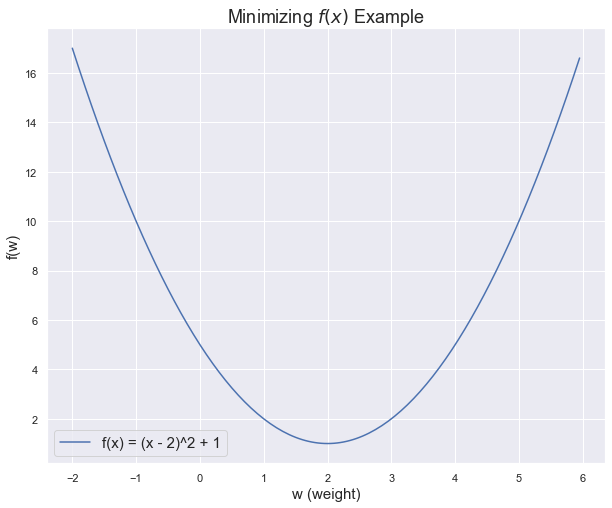

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

def f(w):
    return (w - 2)**2  + 1

domain = np.arange(-2, 6, .05)
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(x) = (x - 2)^2 + 1")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Minimizing $f(x)$ Example", fontsize = 18)
plt.show()


---

Clearly the function $f$ has a *global minimum* at $x = 2$, with value 1. In this notebook our goal will be to find this minimum value for $f$, supposing we did not already know the answer... More specifically, we wish to solve
$$
\min_{w\in \mathbb{R}} f(w) \:\:\:\:\:\:\:\:\:\: (\text{PROBLEM 1})
$$

This class of problems falls into the reahlm of *unconstrained continuous optimization*; for those of you that are more mathematically inclined, see the excellent and classic text of [Nocedal and Wright](http://egrcc.github.io/docs/math/numerical-optimization.pdf) for an in-depth treatment of the subject.

The treatment of PROBLEM 1 given by Nocedal and Wright is extensive and goes much further than what is currently implemented in machine learning. However, the treatment by these authors of the general notion of minimimizing a continuous function without constraints is well applied to our PROBLEM 1. More specifically, we focus on the notion of using the *gradient* (the generalization of the single variable function derivative) in order to "search" for plausable minimum of a function. 

### Starting with a Guess
Suppose we first guess that the minimum value of $f$ occurs at $x = 5$. We can visualize the point $(5, f(5))$ by running the following code in the cell below. 
```python
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(x) = (x - 2)^2 + 1")
plt.scatter([5], [f(5)], color = "magenta", label = "$w_0$: initial guess")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Minimizing $f(x)$ Example", fontsize = 18)
plt.show()
```

---

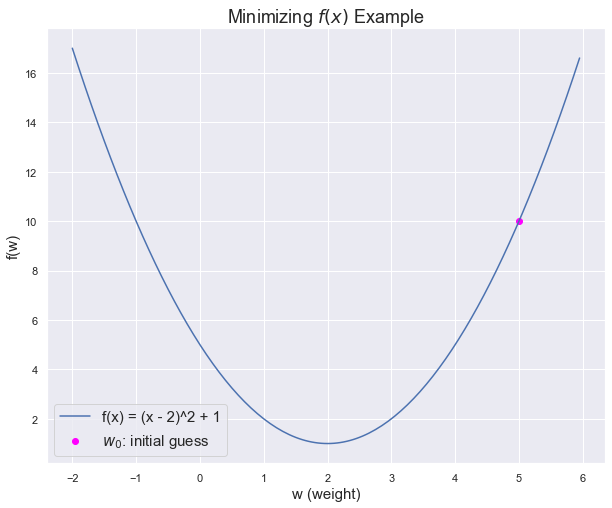

In [27]:
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(x) = (x - 2)^2 + 1")
plt.scatter([5], [f(5)], color = "magenta", label = "$w_0$: initial guess")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Minimizing $f(x)$ Example", fontsize = 18)
plt.show()

---


* ## The General Idea for Searching a Desired Minimum Value
The general idea behind gradient descent is to use the gradient (the derivative for single variable functions) to *provide a direction to explore*. For example, with our function $f$ and initial guess $w_0 = 5$, suppose we are able to calculate the value of the *gradient* (the derivative) of $f$ at $w_0 = 5$. This numerical value will give us the *slope of the tangent line* to $f$ at $w_0$. We can even visualize this tangent line by running the following code in the cell below. 
```python
# Define parabola derivative
def slope(x): 
    return 2*(x - 2)

# Choose point to plot tangent line
x1 = 5
y1 = f(x1)

# Define tangent line
# y = m*(x - x1) + y1
def line(x, x1, y1):
    return slope(x1)*(x - x1) + y1

# Define x data range for tangent line
xrange = np.linspace(x1-1, x1+1, 10)

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(x) = (x - 2)^2 + 1")
plt.scatter([5], [f(5)], color = "magenta", label = "$w_0$: initial guess")
plt.plot(xrange,
        line(xrange, x1, y1), 
        'C1--', 
        linewidth = 1, 
        color = "red", 
        label = "tangent line to $f$")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Minimizing $f(x)$ Example", fontsize = 18)
plt.show()
```



---

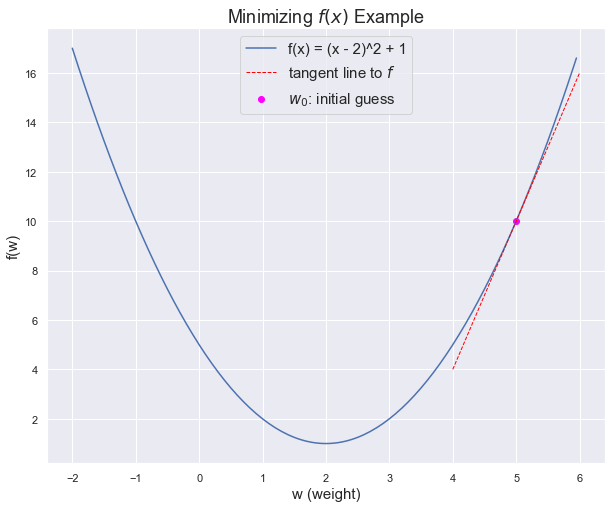

In [29]:
# Define parabola derivative
def slope(x): 
    return 2*(x - 2)

# Choose point to plot tangent line
x1 = 5
y1 = f(x1)

# Define tangent line
# y = m*(x - x1) + y1
def line(x, x1, y1):
    return slope(x1)*(x - x1) + y1

# Define x data range for tangent line
xrange = np.linspace(x1-1, x1+1, 10)

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(x) = (x - 2)^2 + 1")
plt.scatter([5], [f(5)], color = "magenta", label = "$w_0$: initial guess")
plt.plot(xrange,
        line(xrange, x1, y1), 
        'C1--', 
        linewidth = 1, 
        color = "red", 
        label = "tangent line to $f$")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Minimizing $f(x)$ Example", fontsize = 18)
plt.show()


---

Observing the figure generated by the code above, notice that the tangent line is pointing in the direction of descent, i.e., starting at $w_0 = 5$, the tangent line having positive slope indicates that we need move in the negative direction (to the left of $w_0$) if we wish to move to a smaller value of $f$. That is, **we need to move in the direction implied by the opposite sign of the derivtaive of $f$ at $w_0 = 5$**.

### But how far should we move? 
The value of how far to move in the opposite sign of the gradient of $f$ at $w_0 = 5$ from $w_0$ is called the **learning rate** (Nocedal & Wright call is the **step length**), typically denoted by $\alpha$. In gradient descent this value is multiplied with the gradient of $f$ at $w_0$ (the derivative for one variable), and then a new choice of $w$, say $w_1$ is assigned the value:
$$
w_1 = w_0 - \alpha \nabla f(w_0)
$$

The choice of $\alpha$ in machine learning is typically found by experimentation, though more sophesticated techniques are available, such as *line-search* and *trust-region* methods (again see Nocedal & Wright). 

For example, lets choose $alpha = 0.3$ and run the following code in the cell below. 
```python
# Choose point to plot tangent line
w_0 = 5.0
f_1 = f(w_0)

# Set learning rate 
alpha = 0.3

# Moving in the opposite direction of the derivative at w_0
w_1 = w_0 - alpha*2*(w_0 - 2)

# Define tangent line
# y = m*(x - x1) + y1
def line(w, w_old, f_old):
    return slope(w_old)*(w - w_old) + f_old

# Define x data range for tangent line
xrange = np.linspace(w_0 - 1, w_0 + 1, 10)

new_xrange = np.linspace(w_1 - 1, w_1 + 1, 10)

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(w) = (w - 2)^2 + 1")
plt.scatter([w_0], [f(w_0)], color = "magenta", label = "$w_0$: initial guess")
plt.plot(xrange,
        line(xrange, w_0, f(w_0)), 
        'C1--', 
        linewidth = 1, 
        color = "red", 
        label = None)
plt.scatter([w_1], [f(w_1)], color = "red", label = "$w_1$: new guess")
plt.plot(new_xrange,
        line(new_xrange, w_1, f(w_1)), 
        'C1--', 
        linewidth = 1, 
        color = "red", 
        label = None)
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Minimizing $f(x)$ Example", fontsize = 18)
plt.show()
```

---

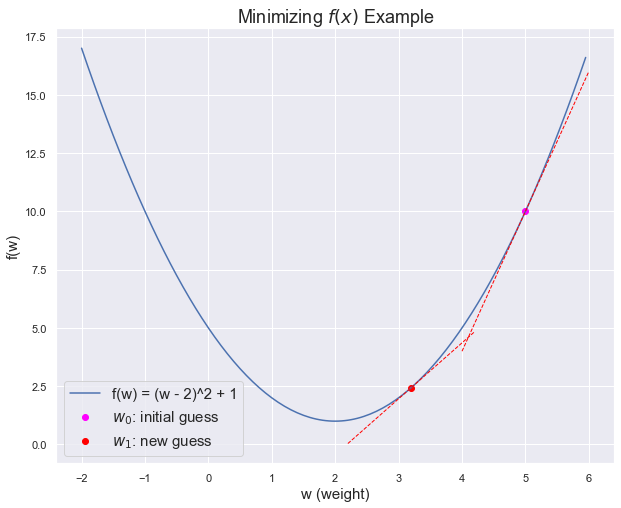

In [40]:
# Choose point to plot tangent line
w_0 = 5.0
f_1 = f(w_0)

# Set learning rate 
alpha = 0.3

# Moving in the opposite direction of the derivative at w_0
w_1 = w_0 - alpha*2*(w_0 - 2)

# Define tangent line
# y = m*(x - x1) + y1
def line(w, w_old, f_old):
    return slope(w_old)*(w - w_old) + f_old

# Define x data range for tangent line
xrange = np.linspace(w_0 - 1, w_0 + 1, 10)

new_xrange = np.linspace(w_1 - 1, w_1 + 1, 10)

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(w) = (w - 2)^2 + 1")
plt.scatter([w_0], [f(w_0)], color = "magenta", label = "$w_0$: initial guess")
plt.plot(xrange,
        line(xrange, w_0, f(w_0)), 
        'C1--', 
        linewidth = 1, 
        color = "red", 
        label = None)
plt.scatter([w_1], [f(w_1)], color = "red", label = "$w_1$: new guess")
plt.plot(new_xrange,
        line(new_xrange, w_1, f(w_1)), 
        'C1--', 
        linewidth = 1, 
        color = "red", 
        label = None)
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Minimizing $f(x)$ Example", fontsize = 18)
plt.show()

---

Notice that the new guess $w_1$ gives a new pair $(w_1, f(w_1))$ which is a better choice of a both a *extrema* and minimum value for $f$ than the initial guess $w_0$ would have given. **We are moving downhill on the function $f$.** Let us move again and see where we end up by running the following code in the cell below. 
```python
# Moving in the opposite direction of the derivative at w_0
w_2 = w_1 - alpha*2*(w_1 - 2)

new_xrange = np.linspace(w_2 - 1, w_2 + 1, 10)

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(w) = (w - 2)^2 + 1")
plt.scatter([w_0], [f(w_0)], color = "magenta", label = "$w_0$: initial guess")
plt.scatter([w_1], [f(w_1)], color = "magenta", label = "$w_1$: new guess")
plt.scatter([w_2], [f(w_2)], color = "red", label = "$w_2$: New new guess")
plt.plot(new_xrange,
        line(new_xrange, w_2, f(w_2)), 
        'C1--', 
        linewidth = 1, 
        color = "red", 
        label = None)
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Minimizing $f(x)$ Example", fontsize = 18)
plt.show()
```

---

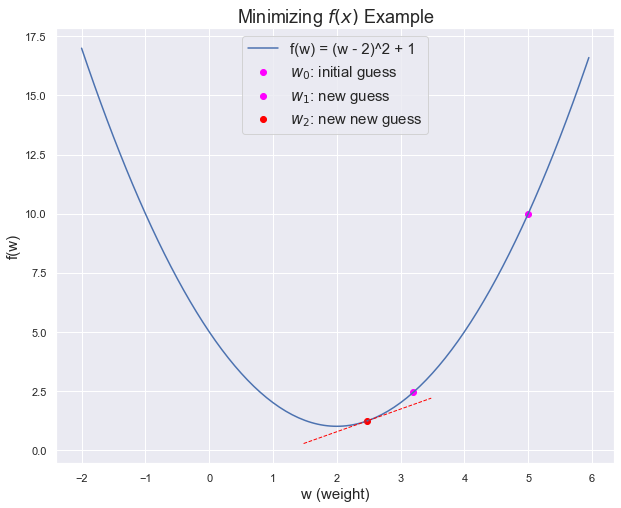

In [41]:
# Moving in the opposite direction of the derivative at w_0
w_2 = w_1 - alpha*2*(w_1 - 2)

new_xrange = np.linspace(w_2 - 1, w_2 + 1, 10)

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(w) = (w - 2)^2 + 1")
plt.scatter([w_0], [f(w_0)], color = "magenta", label = "$w_0$: initial guess")
plt.scatter([w_1], [f(w_1)], color = "magenta", label = "$w_1$: new guess")
plt.scatter([w_2], [f(w_2)], color = "red", label = "$w_2$: new new guess")
plt.plot(new_xrange,
        line(new_xrange, w_2, f(w_2)), 
        'C1--', 
        linewidth = 1, 
        color = "red", 
        label = None)
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Minimizing $f(x)$ Example", fontsize = 18)
plt.show()

---

And one more time by running the following code in the cell below.
```python
# Moving in the opposite direction of the derivative at w_0
w_3 = w_2 - alpha*2*(w_2 - 2)

new_xrange = np.linspace(w_3 - 1, w_3 + 1, 10)

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(w) = (w - 2)^2 + 1")
plt.scatter([w_0], [f(w_0)], color = "magenta", label = "$w_0$: initial guess")
plt.scatter([w_1], [f(w_1)], color = "magenta", label = "$w_1$: new guess")
plt.scatter([w_2], [f(w_2)], color = "magenta", label = "$w_2$: new new guess")
plt.scatter([w_3], [f(w_3)], color = "red", label = "$w_3$: new new new guess")
plt.plot(new_xrange,
        line(new_xrange, w_3, f(w_3)), 
        'C1--', 
        linewidth = 1, 
        color = "red", 
        label = None)
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Minimizing $f(x)$ Example", fontsize = 18)
plt.show()
```


---

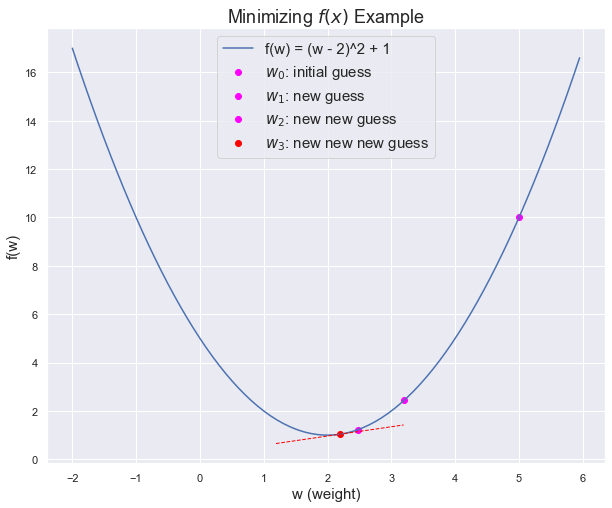

In [42]:
# Moving in the opposite direction of the derivative at w_0
w_3 = w_2 - alpha*2*(w_2 - 2)

new_xrange = np.linspace(w_3 - 1, w_3 + 1, 10)

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(w) = (w - 2)^2 + 1")
plt.scatter([w_0], [f(w_0)], color = "magenta", label = "$w_0$: initial guess")
plt.scatter([w_1], [f(w_1)], color = "magenta", label = "$w_1$: new guess")
plt.scatter([w_2], [f(w_2)], color = "magenta", label = "$w_2$: new new guess")
plt.scatter([w_3], [f(w_3)], color = "red", label = "$w_3$: new new new guess")
plt.plot(new_xrange,
        line(new_xrange, w_3, f(w_3)), 
        'C1--', 
        linewidth = 1, 
        color = "red", 
        label = None)
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Minimizing $f(x)$ Example", fontsize = 18)
plt.show()

---

As you can see by running the above code, we are making our way towards the $\argmin$ and $\min$ values for $f$. I'm guessing we are getting pretty close, and we can verify this by running the following code in the cell below. 
```python
# Moving in the opposite direction of the derivative at w_0
w_4 = w_3 - alpha*2*(w_3 - 2)

new_xrange = np.linspace(w_4 - 1, w_4 + 1, 10)

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(w) = (w - 2)^2 + 1")
plt.scatter([w_0], [f(w_0)], color = "magenta", label = "$w_0$: initial guess")
plt.scatter([w_1], [f(w_1)], color = "magenta", label = "$w_1$: new guess")
plt.scatter([w_2], [f(w_2)], color = "magenta", label = "$w_2$: new new guess")
plt.scatter([w_3], [f(w_3)], color = "red", label = "$w_3$: new new new guess")
plt.scatter([w_4], [f(w_4)], color = "red", label = "$w_3$: last guess")
plt.plot(new_xrange,
        line(new_xrange, w_4, f(w_4)), 
        'C1--', 
        linewidth = 1, 
        color = "red", 
        label = None)
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Minimizing $f(x)$ Example", fontsize = 18)
plt.show()
```


---

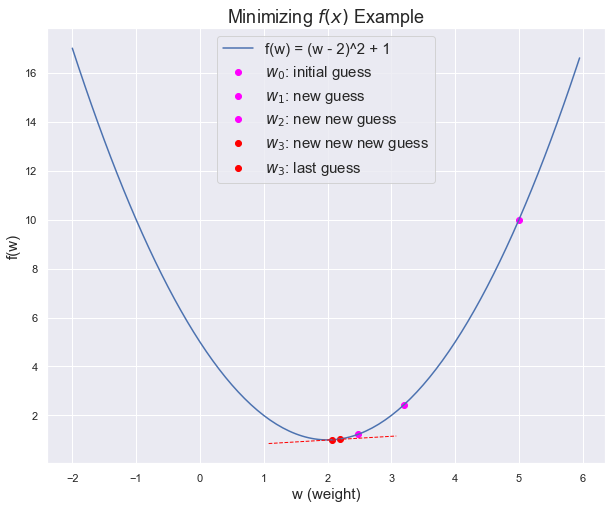

In [43]:
# Moving in the opposite direction of the derivative at w_0
w_4 = w_3 - alpha*2*(w_3 - 2)

new_xrange = np.linspace(w_4 - 1, w_4 + 1, 10)

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(w) = (w - 2)^2 + 1")
plt.scatter([w_0], [f(w_0)], color = "magenta", label = "$w_0$: initial guess")
plt.scatter([w_1], [f(w_1)], color = "magenta", label = "$w_1$: new guess")
plt.scatter([w_2], [f(w_2)], color = "magenta", label = "$w_2$: new new guess")
plt.scatter([w_3], [f(w_3)], color = "red", label = "$w_3$: new new new guess")
plt.scatter([w_4], [f(w_4)], color = "red", label = "$w_3$: last guess")
plt.plot(new_xrange,
        line(new_xrange, w_4, f(w_4)), 
        'C1--', 
        linewidth = 1, 
        color = "red", 
        label = None)
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Minimizing $f(x)$ Example", fontsize = 18)
plt.show()

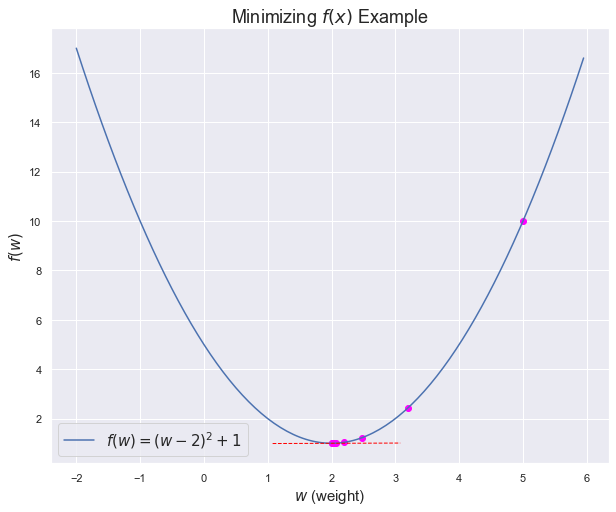

In [48]:
def f(w):
    return (w - 2)**2 +1

def df(w):
    return 2*(w - 2)

domain = np.arange(-2, 6, .05)

alpha = 0.3
W = [5]

while abs(df(W[-1])) > 0.01:
    w_new = W[-1] - alpha*df(W[-1])
    W.append(w_new)

W = np.array(W)
# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")
plt.scatter(W, f(W), color = "magenta")
plt.plot(new_xrange,
        line(new_xrange, W[-1], f(W[-1])), 
        'C1--', 
        linewidth = 1, 
        color = "red", 
        label = None)
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$f(w)$", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Minimizing $f(x)$ Example", fontsize = 18)
plt.show()




---

One very important note to make with this example is that gradient descent will always converge to a *global optimal* solution for any *convex function*, such as the quadratic function we have been playing with. This is not always the case as can be seen with the following code, of which you should run in the cell below. 
```python
def C(w):
    return (w**2*np.cos(w) - w)/10

def dC(w, h = 0.001):
    return (C(w + h) - C(w))/h

def line(x, x1, y1):
    return dC(x1)*(x - x1) + y1

domain = np.arange(-2, 6, .05)

alpha = 0.3
W = [10]

domain = np.arange(-20, 20, .05)

while abs(dC(W[-1])) > 0.01:
    w_new = W[-1] - alpha*dC(W[-1])
    W.append(w_new)


new_xrange = np.linspace(W[-1] - 5, W[-1] + 5, 10)

W = np.array(W)
# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, C(domain), label = "$C(w) = (w^2\cos(w) - w)/10$")
plt.scatter(W, C(W), color = "magenta")
plt.plot(new_xrange,
        line(new_xrange, W[-1], C(W[-1])), 
        'C1--', 
        linewidth = 1, 
        color = "red", 
        label = None)
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$C(w)$", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Minimizing $C(x)$ Example", fontsize = 18)
plt.show()
```

---

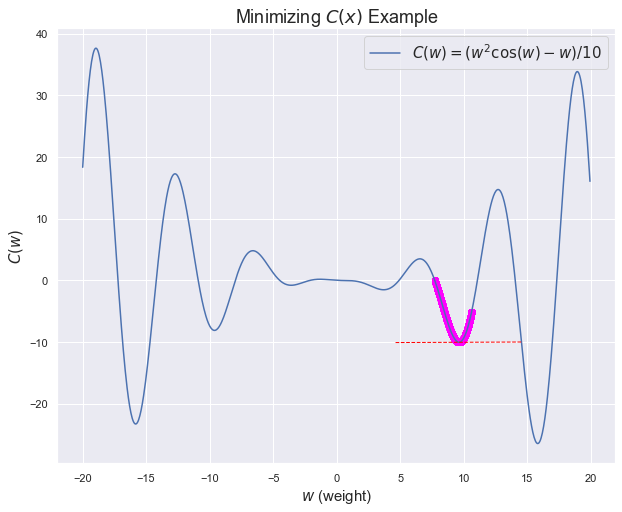

In [65]:
def C(w):
    return (w**2*np.cos(w) - w)/10

def dC(w, h = 0.001):
    return (C(w + h) - C(w))/h

def line(x, x1, y1):
    return dC(x1)*(x - x1) + y1

domain = np.arange(-2, 6, .05)

alpha = 0.3
W = [10]

domain = np.arange(-20, 20, .05)

while abs(dC(W[-1])) > 0.01:
    w_new = W[-1] - alpha*dC(W[-1])
    W.append(w_new)


new_xrange = np.linspace(W[-1] - 5, W[-1] + 5, 10)

W = np.array(W)
# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, C(domain), label = "$C(w) = (w^2\cos(w) - w)/10$")
plt.scatter(W, C(W), color = "magenta")
plt.plot(new_xrange,
        line(new_xrange, W[-1], C(W[-1])), 
        'C1--', 
        linewidth = 1, 
        color = "red", 
        label = None)
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$C(w)$", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Minimizing $C(x)$ Example", fontsize = 18)
plt.show()

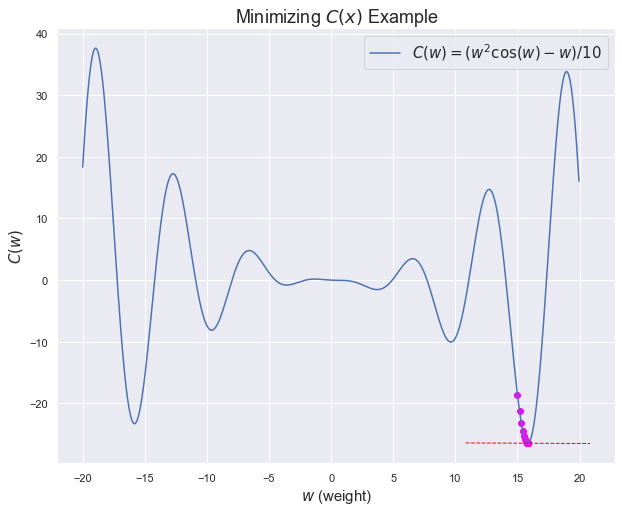

In [64]:
def C(w):
    return (w**2*np.cos(w) - w)/10

def dC(w, h = 0.001):
    return (C(w + h) - C(w))/h

def line(x, x1, y1):
    return dC(x1)*(x - x1) + y1

domain = np.arange(-2, 6, .05)

alpha = 0.01
W = [15]

domain = np.arange(-20, 20, .05)

while abs(dC(W[-1])) > 0.01:
    w_new = W[-1] - alpha*dC(W[-1])
    W.append(w_new)


new_xrange = np.linspace(W[-1] - 5, W[-1] + 5, 10)

W = np.array(W)
# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, C(domain), label = "$C(w) = (w^2\cos(w) - w)/10$")
plt.scatter(W, C(W), color = "magenta")
plt.plot(new_xrange,
        line(new_xrange, W[-1], C(W[-1])), 
        'C1--', 
        linewidth = 1, 
        color = "red", 
        label = None)
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$C(w)$", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Minimizing $C(x)$ Example", fontsize = 18)
plt.show()